In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train_data = np.loadtxt('train.csv', delimiter=',', skiprows=1)

In [3]:
print(train_data.shape)

(42000, 785)


In [4]:
test_size = int(0.2*train_data.shape[0])
print(test_size)

8400


In [5]:
test_data = train_data[:test_size]
train_data = train_data[test_size:]

print(train_data.shape)
print(test_data.shape)

(33600, 785)
(8400, 785)


In [6]:
train_ones = []
train_eights = []
for i in train_data[:]:
    if i[0] == float(1):
        train_ones.append(i)
    elif i[0] == float(8):
        train_eights.append(i)

In [7]:
print(len(train_eights))

3268


In [8]:
print(len(train_ones))

3758


In [9]:
test = []
for i in test_data[:]:
    if i[0] == float(1) or i[0] == float(8):
        test.append(i)

In [10]:
train_ones = np.array(train_ones).astype('float32')
train_eights = np.array(train_eights).astype('float32')
test_data = np.array(test).astype('float32')

In [11]:
train_ones = train_ones[:, 1:]
train_eights = train_eights[:, 1:]

In [12]:
test_label = test_data[:, 0]
test_data = test_data[:, 1:]

In [13]:
print(test_data.shape)
print(test_label.shape)

(1721, 784)
(1721,)


In [14]:
train_one_avgs = []
train_eight_avgs = []

In [15]:
train_one_avgs = np.sum(train_ones, axis=1)/784

In [16]:
X = []
for i in range(3268):
    X.append(i)
    
X = np.array(X).astype('float32')

In [17]:
train_eight_avgs = np.sum(train_eights, axis = 1)/784

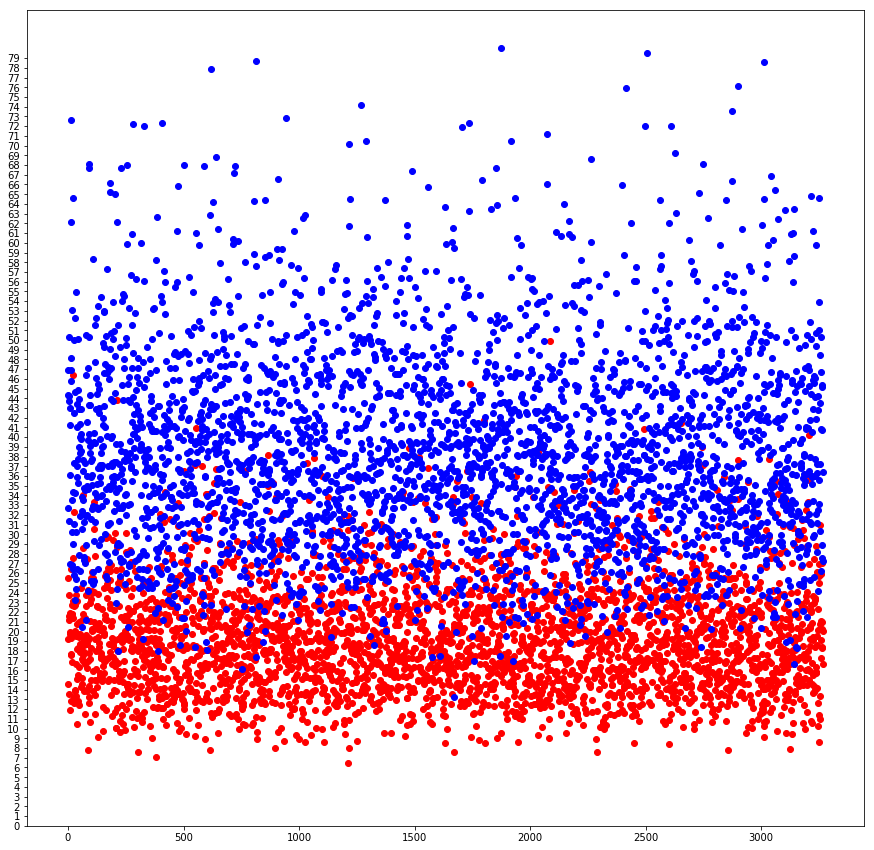

In [18]:
plt.figure(figsize=(15, 15))
plt.scatter(X, train_one_avgs[:3268], color = 'red')
plt.scatter(X, train_eight_avgs, color = 'blue')
plt.yticks(np.arange(0, 80, 1.0))
plt.show()

In [19]:
threshold = 27

In [20]:
test_average = np.sum(test_data, axis=1)/784

In [21]:
print(np.sum(test_label == 8))

795


In [22]:
output = []

In [23]:
for i in test_average:
    if i < float(threshold):
        output.append(1)
    elif i > float(threshold):
        output.append(8)

In [24]:
output = np.array(output).astype('float32')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Accuracy: {}".format(accuracy_score(output, test_label)*100))

Accuracy: 90.87739686228936


### Threshold: 24 -> Acc: 87.68
### Threshold: 25 -> Acc: 88.90
### Threshold: 26 -> Acc: 90.12
### Threshold: 27 -> Acc: 90.87
### Threshold: 28 -> Acc: 90.47